In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

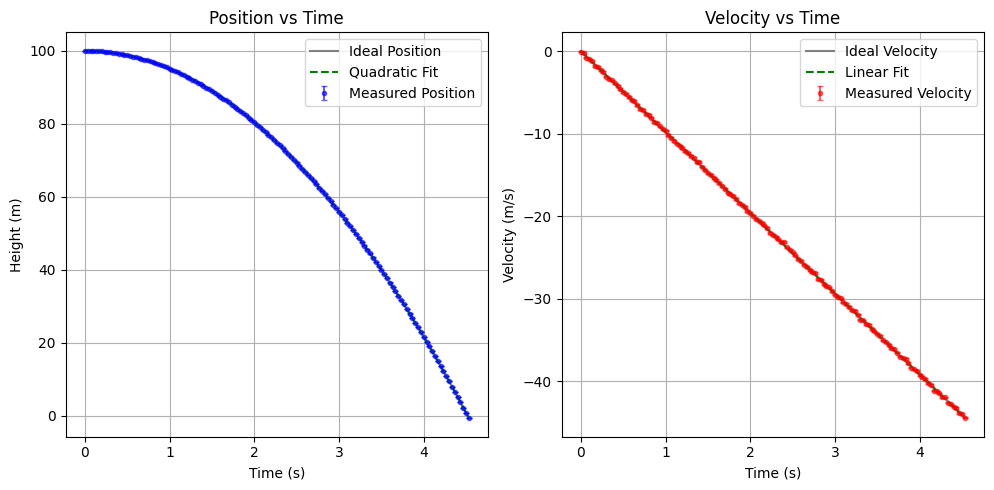

Estimated g from velocity fit: 9.8020 m/s²
Estimated g from position fit: 9.7971 m/s²
True g: 9.7972 m/s²
R² of velocity fit: 0.9999
R² of position fit: 1.0000


In [17]:
# Initial Parameters
g_true = 9.79722   # earth's gravity on my location
h0 = 100           # initial height (m)
v0 = 0             # initial velocity (m/s)
dt = 1/30           # time step (s) (representative of video frame rate from a regular phone camera)
t_max = np.sqrt(2 * h0 / g_true) # estimated final time
t = np.arange(0, t_max + dt, dt)  # time vector

# Equations for position (y) and velocity (v)
y_ideal = h0 - 0.5 * g_true * t**2
v_ideal = -g_true * t

# Noise Simulation (values representative of a video-based motion tracking device)
np.random.seed(42)  # for reproducibility, set some specific but random numbers
noise_y = np.random.normal(0, 0.01, size=t.shape)   # noise of ± 1 cm
noise_v = np.random.normal(0, 0.1, size=t.shape)   # noise of ±0.1 m/s

# Simulated Data
y_simulated = y_ideal + noise_y
v_simulated = v_ideal + noise_v

# Linear regression to estimate gravity from velocity data
slope, intercept, r_value, p_value, std_err = linregress(t, v_simulated)
v_fit = slope * t + intercept  # fitted line

# Quadratic fit on position
coeffs = np.polyfit(t, y_simulated, 2)  # coeffs[0] = a, coeffs[1] = b, coeffs[2] = c
y_fit = np.polyval(coeffs, t)
g_estimated_from_position = -2 * coeffs[0]

# R^2 for quadratic fit
ss_res = np.sum((y_simulated - y_fit)**2)
ss_tot = np.sum((y_simulated - np.mean(y_simulated))**2)
r2_position = 1 - ss_res / ss_tot

# Error values (known from simulation setup)
error_y = 0.01  # ±1 cm
error_v = 0.1   # ±0.1 m/s

plt.figure(figsize=(15, 5))

# Position vs Time with quadratic fit and error bars
plt.subplot(1, 3, 1)
plt.plot(t, y_ideal, label='Ideal Position', color='gray')
plt.errorbar(t, y_simulated, yerr=error_y, fmt='b.', label='Measured Position', alpha=0.6, capsize=2)
plt.plot(t, y_fit, 'g--', label='Quadratic Fit')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Position vs Time')
plt.grid()
plt.legend()

# Velocity vs Time with error bars and fit
plt.subplot(1, 3, 2)
plt.plot(t, v_ideal, label='Ideal Velocity', color='gray')
plt.errorbar(t, v_simulated, yerr=error_v, fmt='r.', label='Measured Velocity', alpha=0.6, capsize=2)
plt.plot(t, v_fit, 'g--', label='Linear Fit')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Results
print(f"Estimated g from velocity fit: {-slope:.4f} m/s²")
print(f"Estimated g from position fit: {g_estimated_from_position:.4f} m/s²")
print(f"True g: {g_true:.4f} m/s²")
print(f"R² of velocity fit: {r_value**2:.4f}")
print(f"R² of position fit: {r2_position:.4f}")

The quadratic fit provides a more accurate result because the parabolic shape of the model is less sensitive to small deviations in the data points. In addition, the position measurements have lower noise compared to the velocity data, whose linear fit is more affected by data dispersion.